In [1]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Define dataframes
df_diagnosis = pd.read_csv("/content/drive/MyDrive/Grad School/Data Wrangling/Data Quality Assessment/Data Assessment/TNX_20200129_Diagnosis.csv", sep = "|")
df_medications = pd.read_csv("/content/drive/MyDrive/Grad School/Data Wrangling/Data Quality Assessment/Data Assessment/TNX_20200129_Medications.csv", sep = "|")
df_terminology = pd.read_excel("/content/drive/MyDrive/Grad School/Data Wrangling/Data Quality Assessment/Data Assessment/TNX_20200129.xlsx", sheet_name = "Terminology")

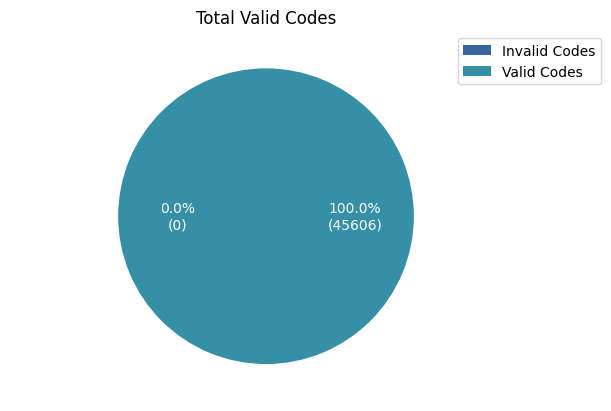

In [77]:
# Data element agreement - check diagnosis and medication codes agains terminology to make sure all codes are valid

# Set color palette
mycolors = sns.color_palette('mako')

# Convert terminology dataframe to string
df_terminology_norm = df_terminology.astype(str)

# Function to check the number of invalid codes in a dataframe
def domain_check(dataframe):
    # Convert dataframe to string
    df_norm = dataframe.astype(str)

    # Filter out invalid codes and calculate total invalid code count
    df_invalid = df_norm[~df_norm["code"].isin(df_terminology_norm["code"])]
    invalid_sum = sum(df_invalid.count())

    return invalid_sum

# Function to create a pie chart showing the distribution of valid and invalid codes
def domain_pie(dataframe1, dataframe2, colors):
    # Calculate the total count of invalid and valid codes for both dataframes
    invalid_input = domain_check(dataframe1) + domain_check(dataframe2)
    valid_input = len(dataframe1) + len(dataframe2) - invalid_input

    # Prepare data and labels for the pie chart
    pie_inputs = [invalid_input, valid_input]
    mylabels = ["Invalid Codes", "Valid Codes"]

    # Create the pie chart
    plt.pie(
        pie_inputs,
        labels=mylabels,
        startangle=180,
        autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * sum(pie_inputs) / 100),
        textprops={'color': 'white'},
        colors=colors
    )
    plt.legend(loc="best", bbox_to_anchor=(1, 0, 0, 1))
    plt.show()

# Call domain_pie funciton with diagnosis and medications dataframes
plt.title("Total Valid Codes")
domain_pie(df_diagnosis, df_medications, mycolors[2:])

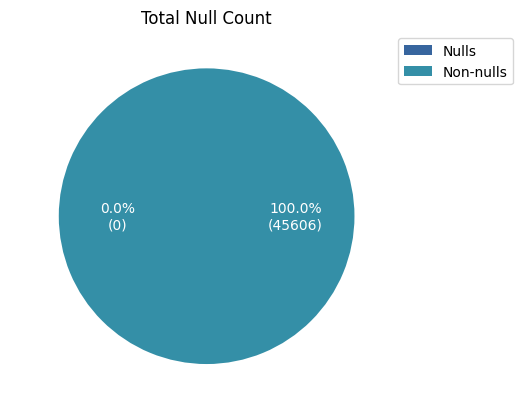

In [86]:
# Element presence - check for null values

# Function to count the total number of null values in a dataframe
def count_nulls(dataframe):
    # List to store null counts for each column
    nulls = []

    # Loop through each column in the dataframe to calculate null count for each column and append to nulls list
    for column in dataframe.columns:
        null_count = dataframe[column].isnull().sum()
        nulls.append(null_count)

    # Sum of null counts for all columns
    total_nulls = sum(nulls)

    return total_nulls

# Function to create a pie chart showing the distribution of null and non-null values
def null_pie(dataframe1, dataframe2, colors):
    # Calculate the total null and non-null counts for both dataframes
    null_count = count_nulls(dataframe1) + count_nulls(dataframe2)
    not_null_count = len(dataframe1) + len(dataframe2) - null_count

    # Prepare data and labels for the pie chart
    input_data = np.array([null_count, not_null_count])
    mylabels = ["Nulls", "Non-nulls"]

    # Create the pie chart
    plt.pie(
        input_data,
        labels=mylabels,
        startangle=180,
        autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * sum(input_data) / 100),
        textprops={'color': 'white'},
        colors=colors
    )
    plt.legend(loc="best", bbox_to_anchor=(1, 0, 0, 1))
    plt.show()

# Call null_pie funciton with diagnosis and medications dataframes
plt.title("Total Null Count")
null_pie(df_diagnosis, df_medications, mycolors[2:])

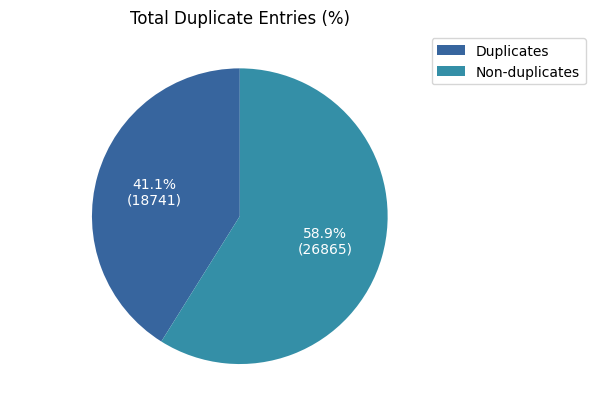

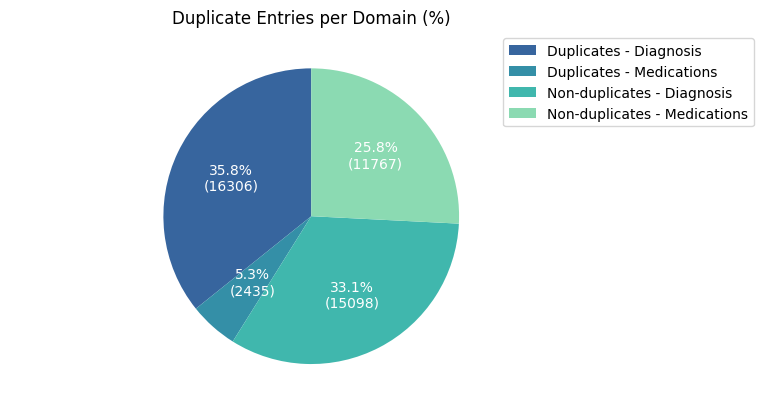

In [87]:
# Element presence - check for duplicate values

# Function to count the total number of duplicate entries in a dataframe
def count_dups(dataframe):
    # Calculate the sum of duplicated entries
    dup_count = dataframe.duplicated().sum()
    return dup_count

# Function to create a pie chart showing the distribution of duplicate and non-duplicate entries
def dup_pie(dataframe1, dataframe2, colors):
    # Calculate the total count of duplicate and non-duplicate entries for both dataframes
    duplicate_count = count_dups(dataframe1) + count_dups(dataframe2)
    nonduplicate_count = len(dataframe1) + len(dataframe2) - duplicate_count

    # Prepare data and labels for the pie chart
    input_data = np.array([duplicate_count, nonduplicate_count])
    mylabels = ["Duplicates", "Non-duplicates"]

    # Create the pie chart
    plt.pie(
        input_data,
        labels=mylabels,
        startangle=90,
        autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * sum(input_data) / 100),
        textprops={'color': 'white'},
        colors=colors
    )
    plt.legend(loc="best", bbox_to_anchor=(1, 0, 0, 1))
    plt.show()

# Function to create a pie chart showing the distribution of duplicates in each domain
def dup_pie_combined(dataframe1, dataframe2, colors):
    # Calculate duplicate and non-duplicate counts for diagnosis dataframe
    d_duplicate_count = count_dups(dataframe1)
    d_nonduplicate_count = len(dataframe1) - d_duplicate_count

    # Calculate duplicate and non-duplicate counts for medications dataframe
    m_duplicate_count = count_dups(dataframe2)
    m_nonduplicate_count = len(dataframe2) - m_duplicate_count

    # Prepare data and labels for the pie chart
    input_data = np.array([d_duplicate_count, m_duplicate_count, d_nonduplicate_count, m_nonduplicate_count])
    mylabels = ["Duplicates - Diagnosis", "Duplicates - Medications", "Non-duplicates - Diagnosis", "Non-duplicates - Medications"]

    # Create the pie chart
    plt.pie(
        input_data,
        labels=mylabels,
        startangle=90,
        autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * sum(input_data) / 100),
        textprops={'color': 'white'},
        colors=colors
    )
    plt.legend(loc="best", bbox_to_anchor=(1, 0, -0.5, 1))
    plt.show()

# Call the dup_pie function with the specified dataframes and colors
plt.title("Total Duplicate Entries (%)")
plt.show(dup_pie(df_diagnosis, df_medications, mycolors[2:]))

print()

# Call the dup_pie_combined function with the specified dataframes and colors
plt.title("Duplicate Entries per Domain (%)")
plt.show(dup_pie_combined(df_diagnosis, df_medications, mycolors[2:]))

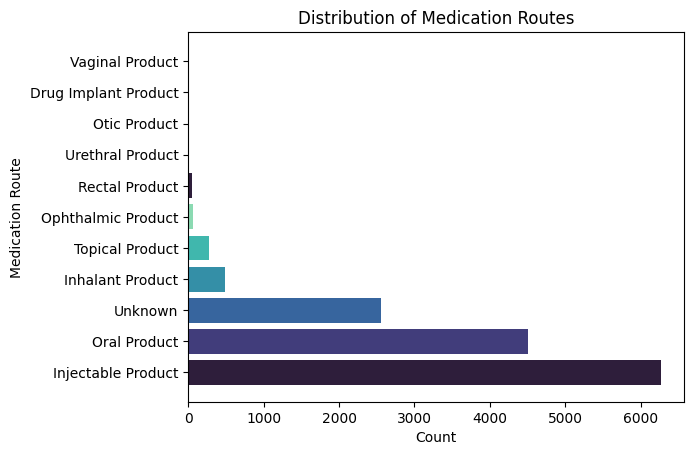

In [88]:
# Validity check - make sure all route options in Medications Domain make sense

# Extract the "route" column from the medications dataframe and initialize empty list
m_routes = df_medications["route"]
values = []

# Looping through each value in the "route" column and appending unique values to list
for i in m_routes:
    if i not in values:
        values.append(i)

# Calculating the count of each unique value in the "route" column
value_counts = m_routes.value_counts()

# Creating a horizontal bar chart to visualize the distribution of medication routes
plt.barh(value_counts.index, value_counts, color=mycolors)
plt.xlabel("Count")
plt.ylabel("Medication Route")
plt.title("Distribution of Medication Routes")
plt.show()

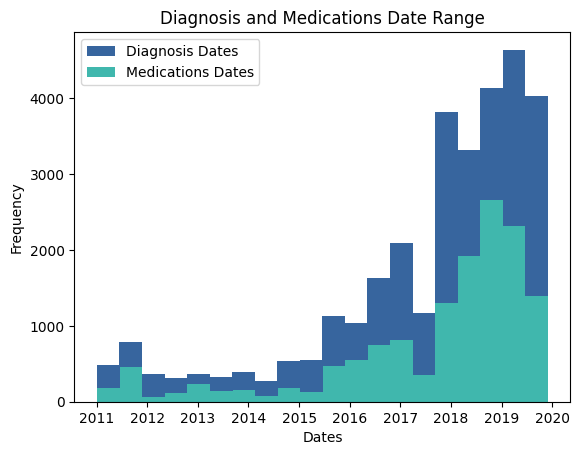

In [89]:
# Currency check - make sure dates are in acceptable range with no outliers

# Extracting the "date" and "start_date" columns from the dataframes
d_dates = df_diagnosis["date"]
m_dates = df_medications["start_date"]

# Function to create histograms for date ranges
def date_range(series, color, label):
    # Convert the date values to datetime format
    form_date = pd.to_datetime(series, format="%Y%m%d")

    # Create a histogram with specified parameters
    plt.hist(form_date, bins=20, color=color, label=label)
    plt.xlabel("Dates")
    plt.ylabel("Frequency")

# Call the date_range function for the diagnosis and medications dates with specific color and label
plt.title("Diagnosis and Medications Date Range")
date_range(d_dates, mycolors[2], label="Diagnosis Dates")
date_range(m_dates, mycolors[4], label="Medications Dates")
plt.legend()
plt.show()

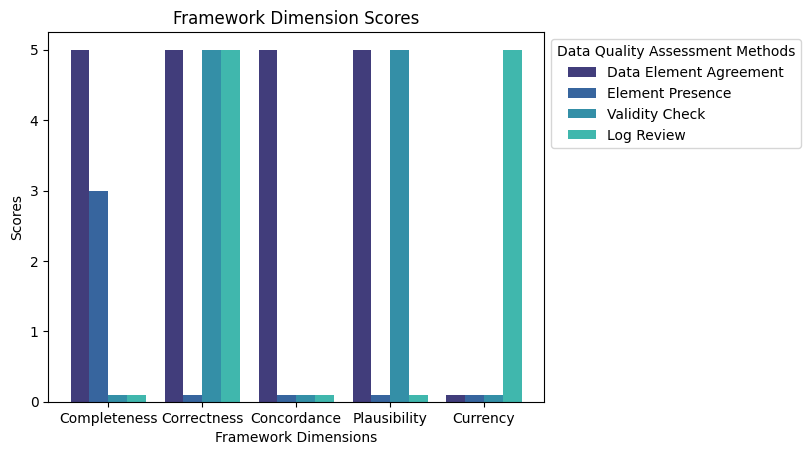

In [90]:
# Summarize data quality based on framework

# Define the framework data
framework = {
    'Framework Dimensions': ["Completeness", "Correctness", "Concordance", "Plausibility", "Currency"],
    'Data Element Agreement': [5, 5, 5, 5, 0.1],
    'Element Presence': [3, 0.1, 0.1, 0.1, 0.1],
    'Validity Check': [0.1, 5, 0.1, 5, 0.1],
    'Log Review': [0.1, 5, 0.1, 0.1, 5]
}

# Create a DataFrame from the framework data
df_framework = pd.DataFrame(framework)

# Extracting data for each dimension
x = framework["Framework Dimensions"]
data = framework["Data Element Agreement"]
element = framework["Element Presence"]
validity = framework["Validity Check"]
log = framework["Log Review"]

# Generate x-coordinates for each group and define bar width
x_coordinates = np.arange(len(framework["Framework Dimensions"]))
width = 0.2

# Plotting the bar chart for each data quality assessment method
plt.bar(x_coordinates - 0.3, data, width=width, label='Data Element Agreement', color=mycolors[1])
plt.bar(x_coordinates - 0.1, element, width=width, label='Element Presence', color=mycolors[2])
plt.bar(x_coordinates + 0.1, validity, width=width, label='Validity Check', color=mycolors[3])
plt.bar(x_coordinates + 0.3, log, width=width, label='Log Review', color=mycolors[4])

# Set x-axis labels at the center of each group
plt.xticks(x_coordinates, framework["Framework Dimensions"], ha="center")

# Set chart title and axis labels
plt.title("Framework Dimension Scores")
plt.xlabel("Framework Dimensions")
plt.ylabel("Scores")

# Show the legend with a title
legend = plt.legend(loc="best", bbox_to_anchor=(1, 0, 0, 1))
legend.set_title("Data Quality Assessment Methods")

# Display the bar chart
plt.show()



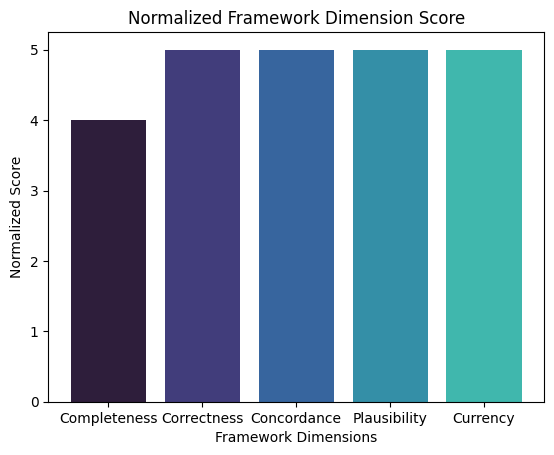

In [85]:
# Normalized framework score
# Define the summarized framework data
framework_sum = {
    'Framework Dimensions': ["Completeness", "Correctness", "Concordance", "Plausibility", "Currency"],
    'Scores': [4, 5, 5, 5, 5]
}

# Create a DataFrame from the summarized framework data
df_framework_sum = pd.DataFrame(framework_sum)

# Extracting data for plotting
xvalue = framework_sum["Framework Dimensions"]
yvalue = framework_sum["Scores"]

# Plotting the bar chart for normalized framework dimension scores
plt.bar(xvalue, yvalue, color=mycolors)

# Setting chart title and axis labels
plt.title("Normalized Framework Dimension Score")
plt.xlabel("Framework Dimensions")
plt.ylabel("Normalized Score")

# Display the bar chart
plt.show()
